# INTERACTING CASE

In [1]:
# executeme

using NBInclude
@nbinclude("Hofstadter Single Particle in Julia.ipynb")

Hofstadter_SP (generic function with 1 method)

In [2]:
using QuantumOptics

In [72]:
# Nx = 4; Ny = 6; N=Nx*Ny; q = Ny; alpha=1/q
# PN = 2
# U = 2;

Nx = 3; Ny = 3; N=Nx*Ny; q = Ny; alpha=1/q
PN = 2
U = 2;

# Proj. yapmadan bunu hesaplamanın yöntemi yok! 88k state geliyor :D
# Nx = 8; Ny = 10; N=Nx*Ny; q = Ny; alpha=1/q
# PN = 3
# U = 2;

In [73]:
# executeme

function get_Bosonic_MB_Basis(N,PN)
   
    NBasis = NLevelBasis(N)
    NStates = bosonstates(NBasis, PN)
    
    NBasis_MB = ManyBodyBasis(NBasis, NStates)
    
    return NBasis_MB, NBasis
end

get_Bosonic_MB_Basis (generic function with 1 method)

In [74]:
basis_mb, basis = get_Bosonic_MB_Basis(N,PN)

(ManyBody(onebodybasis=NLevel(N=9), states:45), NLevel(N=9))

In [75]:
# executeme

function get_Kinetic_Part(N, MB_Basis, Sp_Op)
    KT = SparseOperator(MB_Basis)
    for m in 1:N
        for n in 1:N
            KT = KT + Sp_Op[m,n] * transition(MB_Basis, m, n)
        end
    end
    
    return KT
end

get_Kinetic_Part (generic function with 1 method)

In [76]:
basis2 = basis ⊗ basis

# interaction : at_i at_i a_i a_i = at_i a_i at_i a_i - at_i a_i = n_i n_i - n_i
    
Vint2 = SparseOperator(basis2)

for n in 1:N
    Vint2 += U/2*transition(basis,n,n)⊗transition(basis,n,n)
end

Vint_mb = manybodyoperator(basis_mb, Vint2)

Operator(dim=45x45)
  basis: ManyBody(onebodybasis=NLevel(N=9), states:45)sparse([1, 10, 18, 25, 31, 36, 40, 43, 45], [1, 10, 18, 25, 31, 36, 40, 43, 45], ComplexF64[2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im, 2.0000000000000004 + 0.0im], 45, 45)

In [77]:
# executeme

function get_Int_Part(N, MB_Basis, U)
    IT = SparseOperator(MB_Basis)
    for m in 1:N
        IT = IT + U/2 * number(MB_Basis, m) * ( number(MB_Basis, m) - identityoperator(MB_Basis) ) 
    end
    
    return IT
end

get_Int_Part (generic function with 1 method)

In [78]:
Int_mb = get_Int_Part(N, basis_mb, U)

Operator(dim=45x45)
  basis: ManyBody(onebodybasis=NLevel(N=9), states:45)sparse([1, 10, 18, 25, 31, 36, 40, 43, 45], [1, 10, 18, 25, 31, 36, 40, 43, 45], ComplexF64[2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im, 2.0 + 0.0im], 45, 45)

In [79]:
# executeme

function Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis, Basis = get_Bosonic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Finite_U (generic function with 1 method)

1) If particle number=1 and U=0, Hofstadter Finite U energies has to be equal to Hofstadter Single Particle energies.

In [80]:
H_mb = Hofstadter_Finite_U(Nx, Ny, 1/q, PN, U)

Operator(dim=45x45)
  basis: ManyBody(onebodybasis=NLevel(N=9), states:45)sparse([1, 2, 3, 4, 7, 1, 3, 5, 8, 10  …  38, 41, 42, 43, 45, 24, 39, 42, 44, 45], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2  …  44, 44, 44, 44, 44, 45, 45, 45, 45, 45], ComplexF64[2.0 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.4142135623730951 + 0.0im  …  -1.0 + 0.0im, 0.5000000000000004 + 0.8660254037844386im, 0.5000000000000004 - 0.8660254037844386im, 0.7071067811865482 - 1.224744871391589im, 0.7071067811865482 + 1.224744871391589im, -1.4142135623730951 + 0.0im, -1.4142135623730951 + 0.0im, 0.7071067811865482 + 1.224744871391589im, 0.7071067811865482 - 1.224744871391589im, 2.0 + 0.0im], 45, 45)

In [81]:
eigenenergies(H_mb)

INFO: Defaulting to sparse diagonalization.
        If storing the full operator is possible, it might be faster to do
        eigenstates(dense(op)). Set info=false to turn off this message.


6-element Vector{ComplexF64}:
 -5.340971176014532 + 1.3021306984143355e-16im
 -5.340971176014518 + 1.3755367642741191e-17im
 -5.340971176014516 - 2.229317187840829e-17im
 -5.066168265618848 + 5.898059571002095e-17im
 -5.066168265618841 + 5.819285754226494e-17im
 -5.066168265618835 + 1.1574535817640563e-16im

In [82]:
eigenenergies(dense(Hofstadter_Finite_U(Nx,Ny,1/q,PN,U)))

45-element Vector{Float64}:
 -5.340971176014521
 -5.340971176014518
 -5.340971176014505
 -5.066168265618831
 -5.066168265618825
 -5.066168265618825
 -1.8128503544788694
 -1.8128503544788686
 -1.812850354478868
 -1.7045703369311707
 -1.7045703369311707
 -1.7045703369311689
 -1.64575131106459
  ⋮
  3.268482609755459
  3.2684826097554605
  3.268482609755462
  3.6457513110645836
  3.6457513110645876
  3.6457513110645925
  4.5195428975310294
  4.519542897531033
  4.519542897531036
  4.662503113875357
  4.662503113875362
  4.6625031138753705

In [83]:
using LinearAlgebra
eigen(Hofstadter_SP(4, 4, 1/4, 0))

Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
16-element Vector{Float64}:
 -2.8284271247461885
 -2.8284271247461876
 -2.8284271247461867
 -2.828427124746186
 -1.5885259206217286e-16
 -6.158601528183403e-17
  4.110075077717591e-17
  1.186225349076427e-16
  3.1086244689504383e-15
  3.1086244689504383e-15
  3.1086244689504383e-15
  4.884981308350689e-15
  2.8284271247461894
  2.8284271247461903
  2.8284271247461903
  2.8284271247461903
vectors:
16×16 Matrix{ComplexF64}:
  -0.0328925-0.277237im    …        -0.125+0.125im
  0.00332264-0.279204im                0.0+0.0im
   -0.249043-0.192656im             -0.125-0.125im
   -0.129583-0.242553im           0.353553+0.0im
 -0.00171222-0.197646im                0.0+0.0im
    0.187957-0.0518321im   …           0.0+0.0im
   -0.270744+0.0548745im               0.0+0.0im
  -0.0845807-0.216151im              -0.25-1.54074e-33im
   -0.136269-0.00925389im            0.125+0.125im
    0.275779-0.136432im                0.0+0.0i

In [84]:
function get_Fermionic_MB_Basis(N,PN)
    b_hard = NLevelBasis(N)
    states_hard = fermionstates(b_hard, [PN])
    b_mb_hard = ManyBodyBasis(b_hard, states_hard)
    
    return b_mb_hard
end

get_Fermionic_MB_Basis (generic function with 1 method)

In [85]:
function Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)
    
    N = Nx*Ny
    
    MB_Basis = get_Fermionic_MB_Basis(N,PN)
    
    Sp_Op = Hofstadter_SP(Nx, Ny, alpha, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

Hofstadter_Hard_Core (generic function with 1 method)

If U>>1, Hofstadter Finite U energies converges at Hofstadter Hard Core energies.

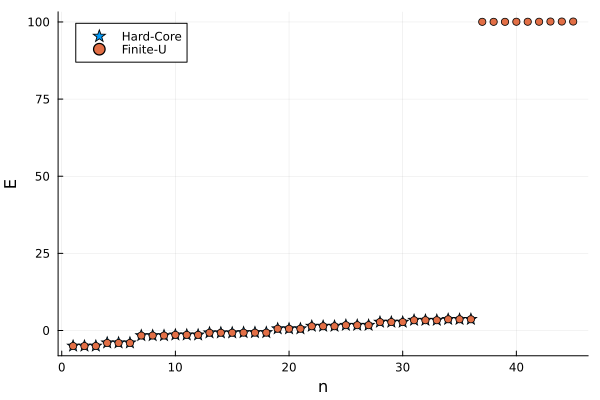

In [86]:
using Plots

U = 100

E1 = eigenenergies(dense(Hofstadter_Hard_Core(Nx, Ny, alpha, PN, U)))
E2 = eigenenergies(dense(Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)))

plot(1:length(E1), E1, seriestype=:scatter, markershape=:star5, markersize=6, label="Hard-Core")
plot!(1:length(E2), E2, seriestype=:scatter, label="Finite-U")

xlabel!("n");ylabel!("E")

# CHERN (INTERACTING CASE)

In [88]:
U = 2
E = eigenenergies(dense(Hofstadter_Finite_U(Nx, Ny, alpha, PN, U)))
#plot(1:length(E), E, seriestype=:scatter, markershape=:star5, markersize=6)

45-element Vector{Float64}:
 -5.340971176014521
 -5.340971176014518
 -5.340971176014505
 -5.066168265618831
 -5.066168265618825
 -5.066168265618825
 -1.8128503544788694
 -1.8128503544788686
 -1.812850354478868
 -1.7045703369311707
 -1.7045703369311707
 -1.7045703369311689
 -1.64575131106459
  ⋮
  3.268482609755459
  3.2684826097554605
  3.268482609755462
  3.6457513110645836
  3.6457513110645876
  3.6457513110645925
  4.5195428975310294
  4.519542897531033
  4.519542897531036
  4.662503113875357
  4.662503113875362
  4.6625031138753705

In [71]:
@nbinclude("Hofstadter Single Particle in Theta Space.ipynb")

# Nx=4; Ny=6; N=Nx*Ny; q=Ny; PN=2; U=2; TSize=5

Nx=3; Ny=3; N=Nx*Ny; q=Ny; PN=2; U=0; TSize=10

n1 = 16
n2 = 24

function Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx, Ty, PN, U)
    
    N = Nx*Ny
    
    MB_Basis, Basis = get_Bosonic_MB_Basis(N,PN)
    
    Sp_Op = HSP_T(Nx, Ny, alpha, Tx, Ty, 0)
    Kin = get_Kinetic_Part(N, MB_Basis, Sp_Op)
    
    Int = get_Int_Part(N, MB_Basis, U)
    
    H = Kin + Int
    
    return H
end

# Twist Angle Parameter Space #
dx=2*pi/TSize
dy=dx
Tx=collect(range(start=0, stop=2*pi-dx, step=dx))
Ty=collect(range(start=0, stop=2*pi-dy, step=dy))
# ---- #

# Link Variable and Berry Curvature #
Sum=0
for tx in range(start=1, stop=length(Tx))
    for ty in range(start=1, stop=length(Ty))
        
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx], Ty[ty], PN, U)
        w1, v1 = eigen(dense(H_mb).data)
        # i = sortperm(w1, by=real);w1 = w1[i];v1 = v1[:,i]
        v1 = v1[:,n1:n2]  
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty], PN, U)
        w2, v2 = eigen(dense(H_mb).data)
        #i = sortperm(w2, by=real);w2 = w2[i];v2 = v2[:,i]
        v2 = v2[:,n1:n2]
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx], Ty[ty]+dy, PN, U)
        w3, v3 = eigen(dense(H_mb).data)
        #i = sortperm(w3, by=real);w3 = w3[i];v3 = v3[:,i]
        v3 = v3[:,n1:n2]
        #------------------------------------
        H_mb = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[tx]+dx, Ty[ty]+dy, PN, U)
        w4, v4 = eigen(dense(H_mb).data)
        #i = sortperm(w4, by=real);w4 = w4[i];v4 = v4[:,i]
        v4 = v4[:,n1:n2]
        #----------LINK VARIABLES------------
        U1=det(adjoint(v1)*v2)
        U1=U1/abs(U1)
        U2=det(adjoint(v2)*v4)
        U2=U2/abs(U2)
        U3=det(adjoint(v3)*v4)
        U3=U3/abs(U3)
        U4=det(adjoint(v1)*v3)
        U4=U4/abs(U4)
        #----------BERRY CURVATURE-----------
        F=log(U1*U2*1/U3*1/U4)
        Sum=Sum+F 
    end
end
# ---- #

print("Chern Number is: ", 1/(2*pi*1im)*Sum)

Chern Number is: 6.0046910114196645 + 1.3136413777245537e-16im

In [98]:
U = 2
PN = 2
H_Finite = Hofstadter_Finite_U_C(Nx, Ny, alpha, Tx[2], Ty[2], PN, U)
Ee, Uu = eigenenergies(dense(H_Finite ))

45-element Vector{Float64}:
 -5.244968906605933
 -5.244968906605926
 -5.244968906605921
 -4.974840172499153
 -4.9748401724991425
 -4.974840172499139
 -1.9720102603513892
 -1.972010260351389
 -1.9720102603513883
 -1.890449488035411
 -1.8904494880354106
 -1.8904494880354092
 -1.55948194474537
  ⋮
  3.3657376516283706
  3.3657376516283715
  3.365737651628373
  3.4551008923445496
  3.4551008923445523
  3.4551008923445545
  4.758323604041526
  4.758323604041532
  4.758323604041532
  4.818883774286787
  4.818883774286787
  4.818883774286793

In [ ]:
4
-3
6.0046910114196645
-6.9939547502816435
-3
4